# **Importing libraries**

In [2]:
import numpy                    as np
import pandas                   as pd
import matplotlib.pyplot        as plt 
import seaborn                  as sns
import plotly.express           as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import scipy.stats              as stats
import missingno                as msno
from   sklearn.linear_model     import LinearRegression
from   sklearn.tree             import DecisionTreeRegressor
from   sklearn.ensemble         import RandomForestRegressor
from   sklearn.svm              import SVR
from   sklearn.model_selection  import train_test_split
from   sklearn.preprocessing    import OneHotEncoder
from   sklearn.metrics          import mean_squared_error,mean_absolute_error,r2_score
from   sklearn.impute           import SimpleImputer
from   sklearn.preprocessing    import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# **Reading train and test datasets**

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
ID = test.Id # for final submission

### **Checking information of train and test datasets**

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### **Checking how many columns are there in train dataset having null values greater than 0**

In [8]:
train.isnull().sum()[train.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### **Checking how many columns are there in test dataset having null values greater than 0**

In [9]:
test.isnull().sum()[test.isnull().sum()>0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

# **Data Preprocessing**

In [10]:
train.isnull().sum()[train.isnull().sum()>1000]

Alley          1369
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [11]:
test.isnull().sum()[test.isnull().sum()>1000]

Alley          1352
PoolQC         1456
Fence          1169
MiscFeature    1408
dtype: int64

### **Nullity matrix representing available values with gray area while null values with white**

<AxesSubplot:>

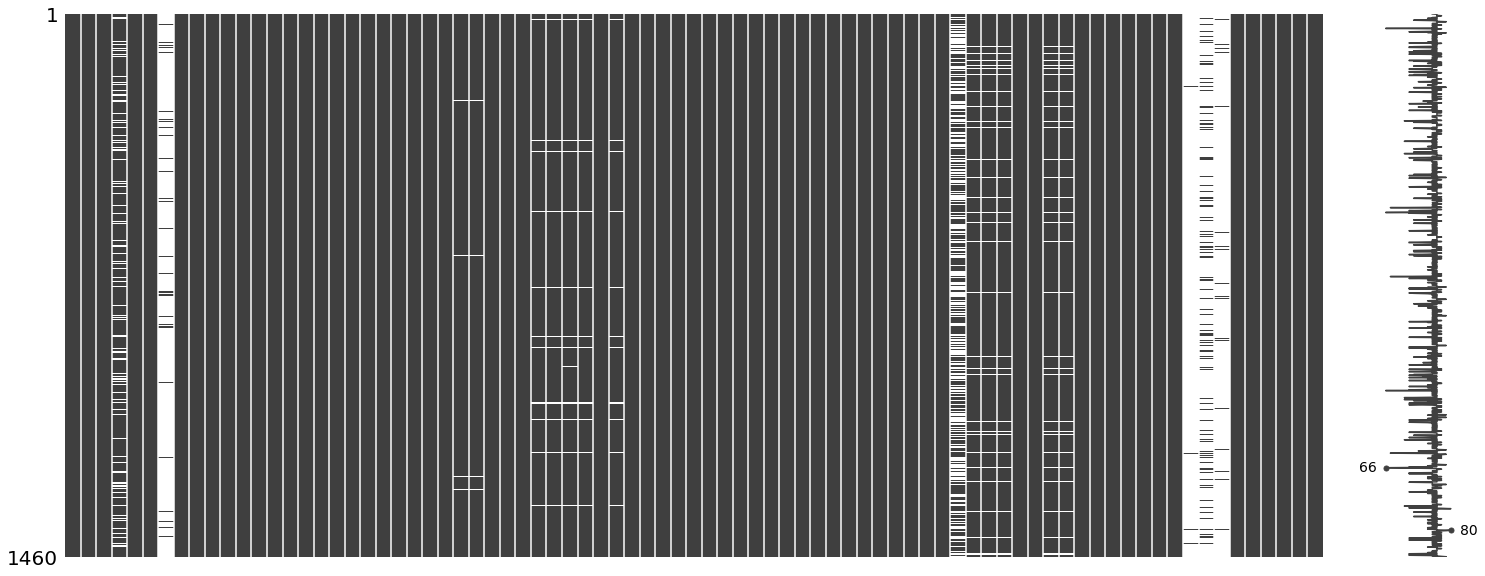

In [12]:
msno.matrix(train)

<AxesSubplot:>

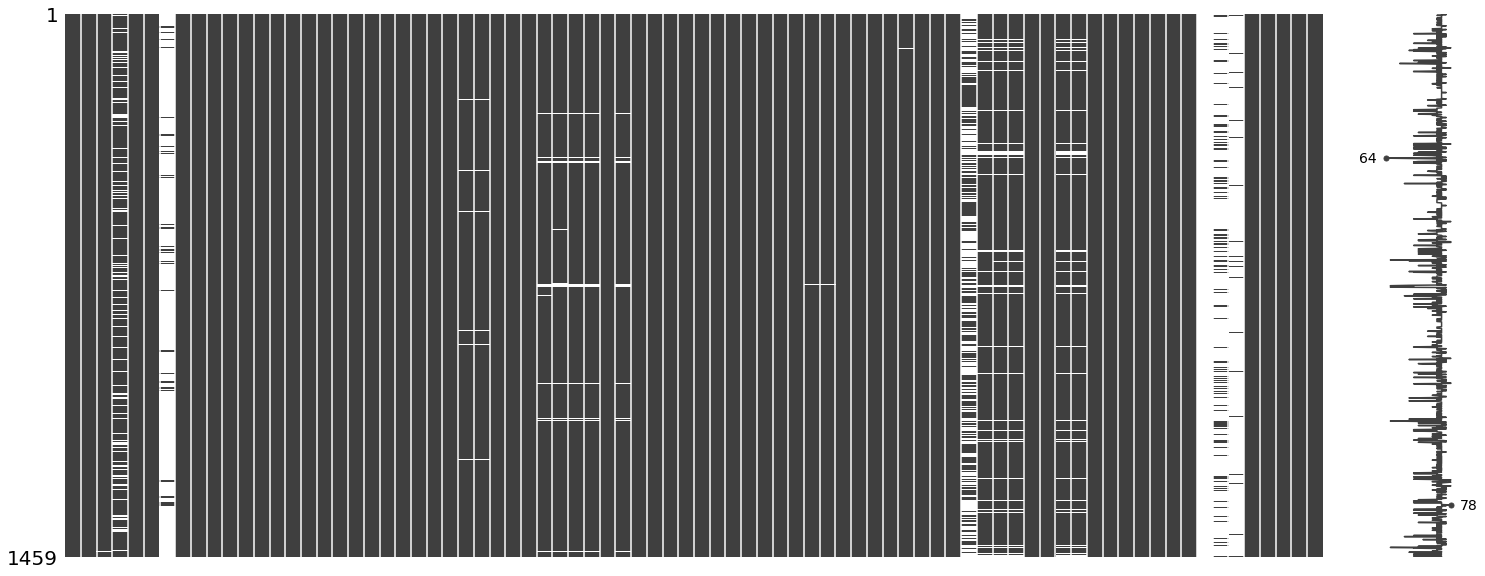

In [13]:
msno.matrix(test)

### Dropping features having missing values greater than 1000

In [14]:
train = train.drop(['Alley','PoolQC','Fence','MiscFeature'] , axis = 1)
test = test.drop(['Alley','PoolQC','Fence','MiscFeature'] , axis = 1)

In [15]:
train.isnull().sum()[train.isnull().sum()>0].index

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [16]:
test.isnull().sum()[test.isnull().sum()>0].index

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'SaleType'],
      dtype='object')

# **Imputation**

In [15]:
px.box(train,y = ['LotFrontage','MasVnrArea','GarageYrBlt']).update_layout(template='plotly_dark')

In [17]:
num_imp_median = SimpleImputer(strategy='median')

train[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea']] = num_imp_median.fit_transform(train[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea']])
test[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea']] = num_imp_median.transform(test[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea']])

num_imp_mean = SimpleImputer(strategy='mean')
train[['GarageYrBlt']] = num_imp_mean.fit_transform(train[['GarageYrBlt']])
test[['GarageYrBlt']] = num_imp_mean.transform(test[['GarageYrBlt']])

In [18]:
cat_col = SimpleImputer(strategy='most_frequent')

train[['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType','Electrical']] = cat_col.fit_transform(train[['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType','Electrical']])
test[['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType','Electrical']] = cat_col.fit_transform(test[['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType','Electrical']])

<AxesSubplot:>

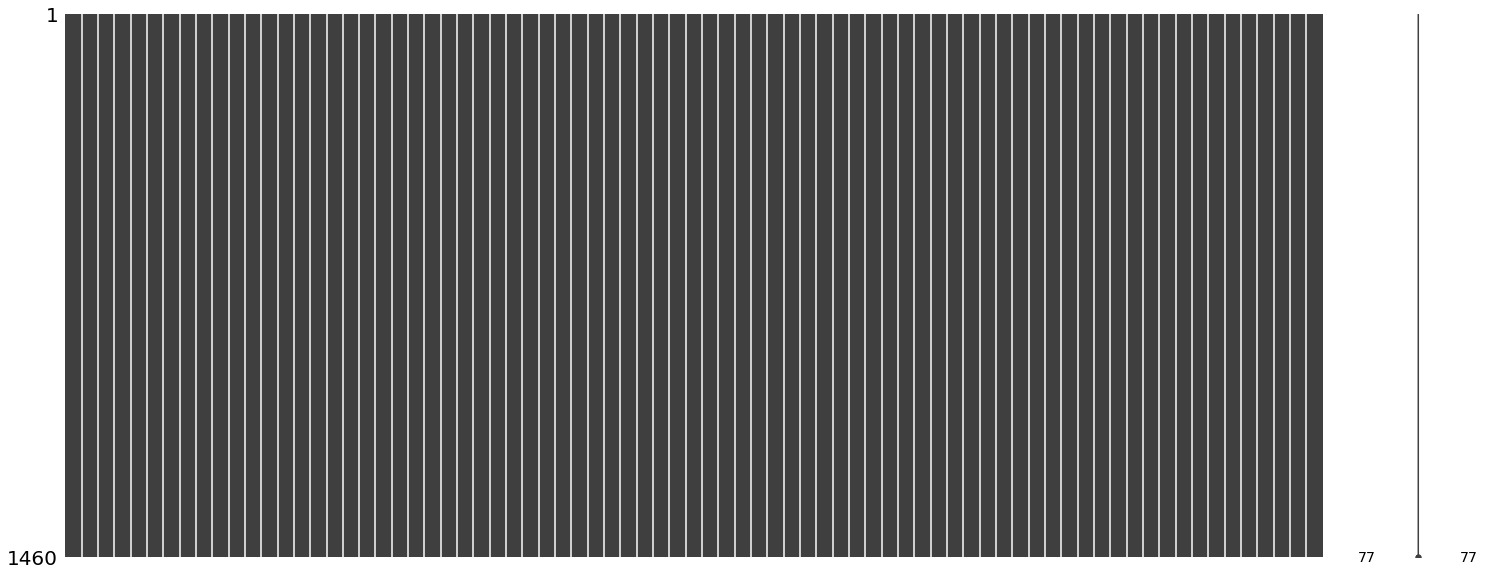

In [18]:
msno.matrix(train)

<AxesSubplot:>

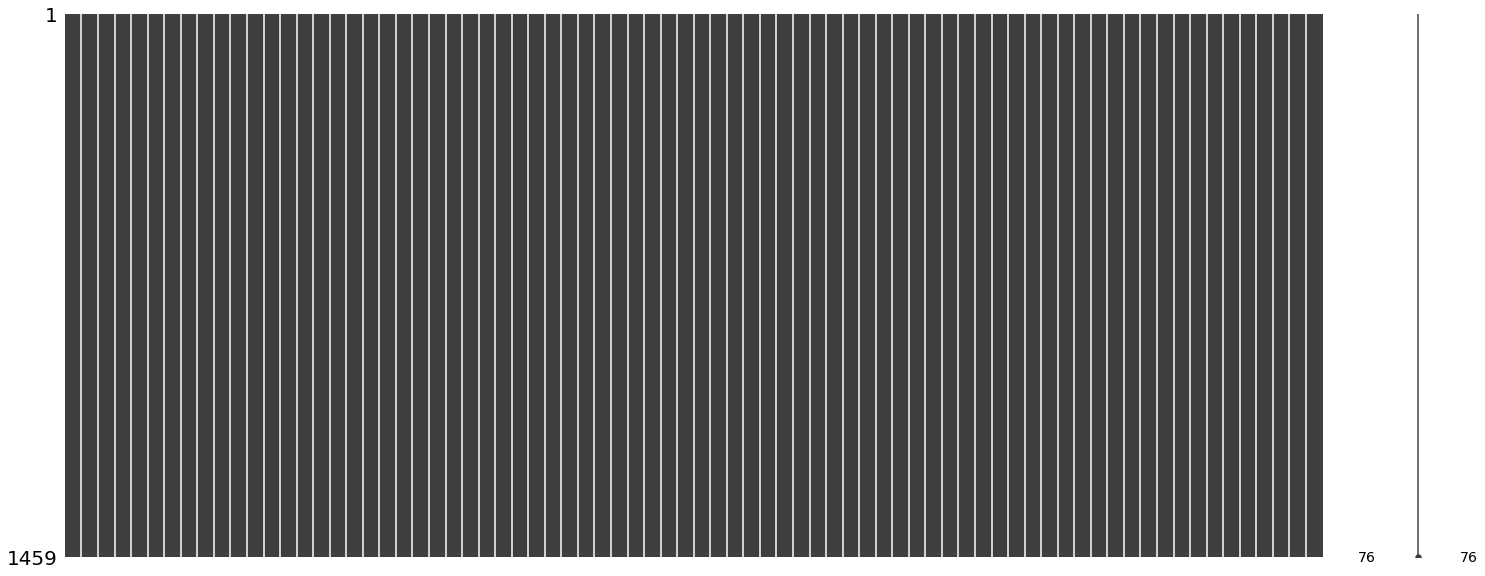

In [19]:
msno.matrix(test)

## **Cardinality**
* Selecting features having total number of unique values less than 10.

In [19]:
low_cardinality_cols_train = [cname for cname in train.columns if train[cname].nunique() < 10 and train[cname].dtype == "object"]
low_cardinality_cols_test = [cname for cname in test.columns if train[cname].nunique() < 10 and test[cname].dtype == "object"]
num_col_train = train.select_dtypes(include = 'number').columns
num_col_test = test.select_dtypes(include = 'number').columns
len(low_cardinality_cols_train),len(low_cardinality_cols_test) , len(num_col_train) , len(num_col_test)

(36, 36, 38, 37)

In [20]:
total_train_col = np.concatenate((low_cardinality_cols_train,num_col_train))
total_test_col = np.concatenate((low_cardinality_cols_test,num_col_test))

In [21]:
train = train[total_train_col]
test = test[total_test_col]
train.shape , test.shape 

((1460, 74), (1459, 73))

# **Exploratory Data Analysis**

In [23]:
fig = px.imshow(train.corr(),text_auto='.2f',zmin = -1 , zmax = 1 , 
                color_continuous_scale=px.colors.sequential.Aggrnyl).update_layout(template='plotly_dark')
fig.layout.height = 1200
fig.show()

### **Below heatmap representing features having correlatation greater than 0.5 and lesser than -0.5**

In [24]:
fig = px.imshow(train.corr()[(train.corr()>0.5) | (train.corr()<=-.5)],text_auto='.2f',zmin = -1 , zmax = 1 , 
                color_continuous_scale=px.colors.sequential.Aggrnyl).update_layout(template='plotly_dark')
fig.layout.height = 1200
fig.show()

In [25]:
((train.corr()['SalePrice']>0.3) | (train.corr()['SalePrice']<-0.3))[((train.corr()['SalePrice']>0.3)|(train.corr()['SalePrice']<-0.3))].index

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

### **Checking the distribution of selected correlated features**

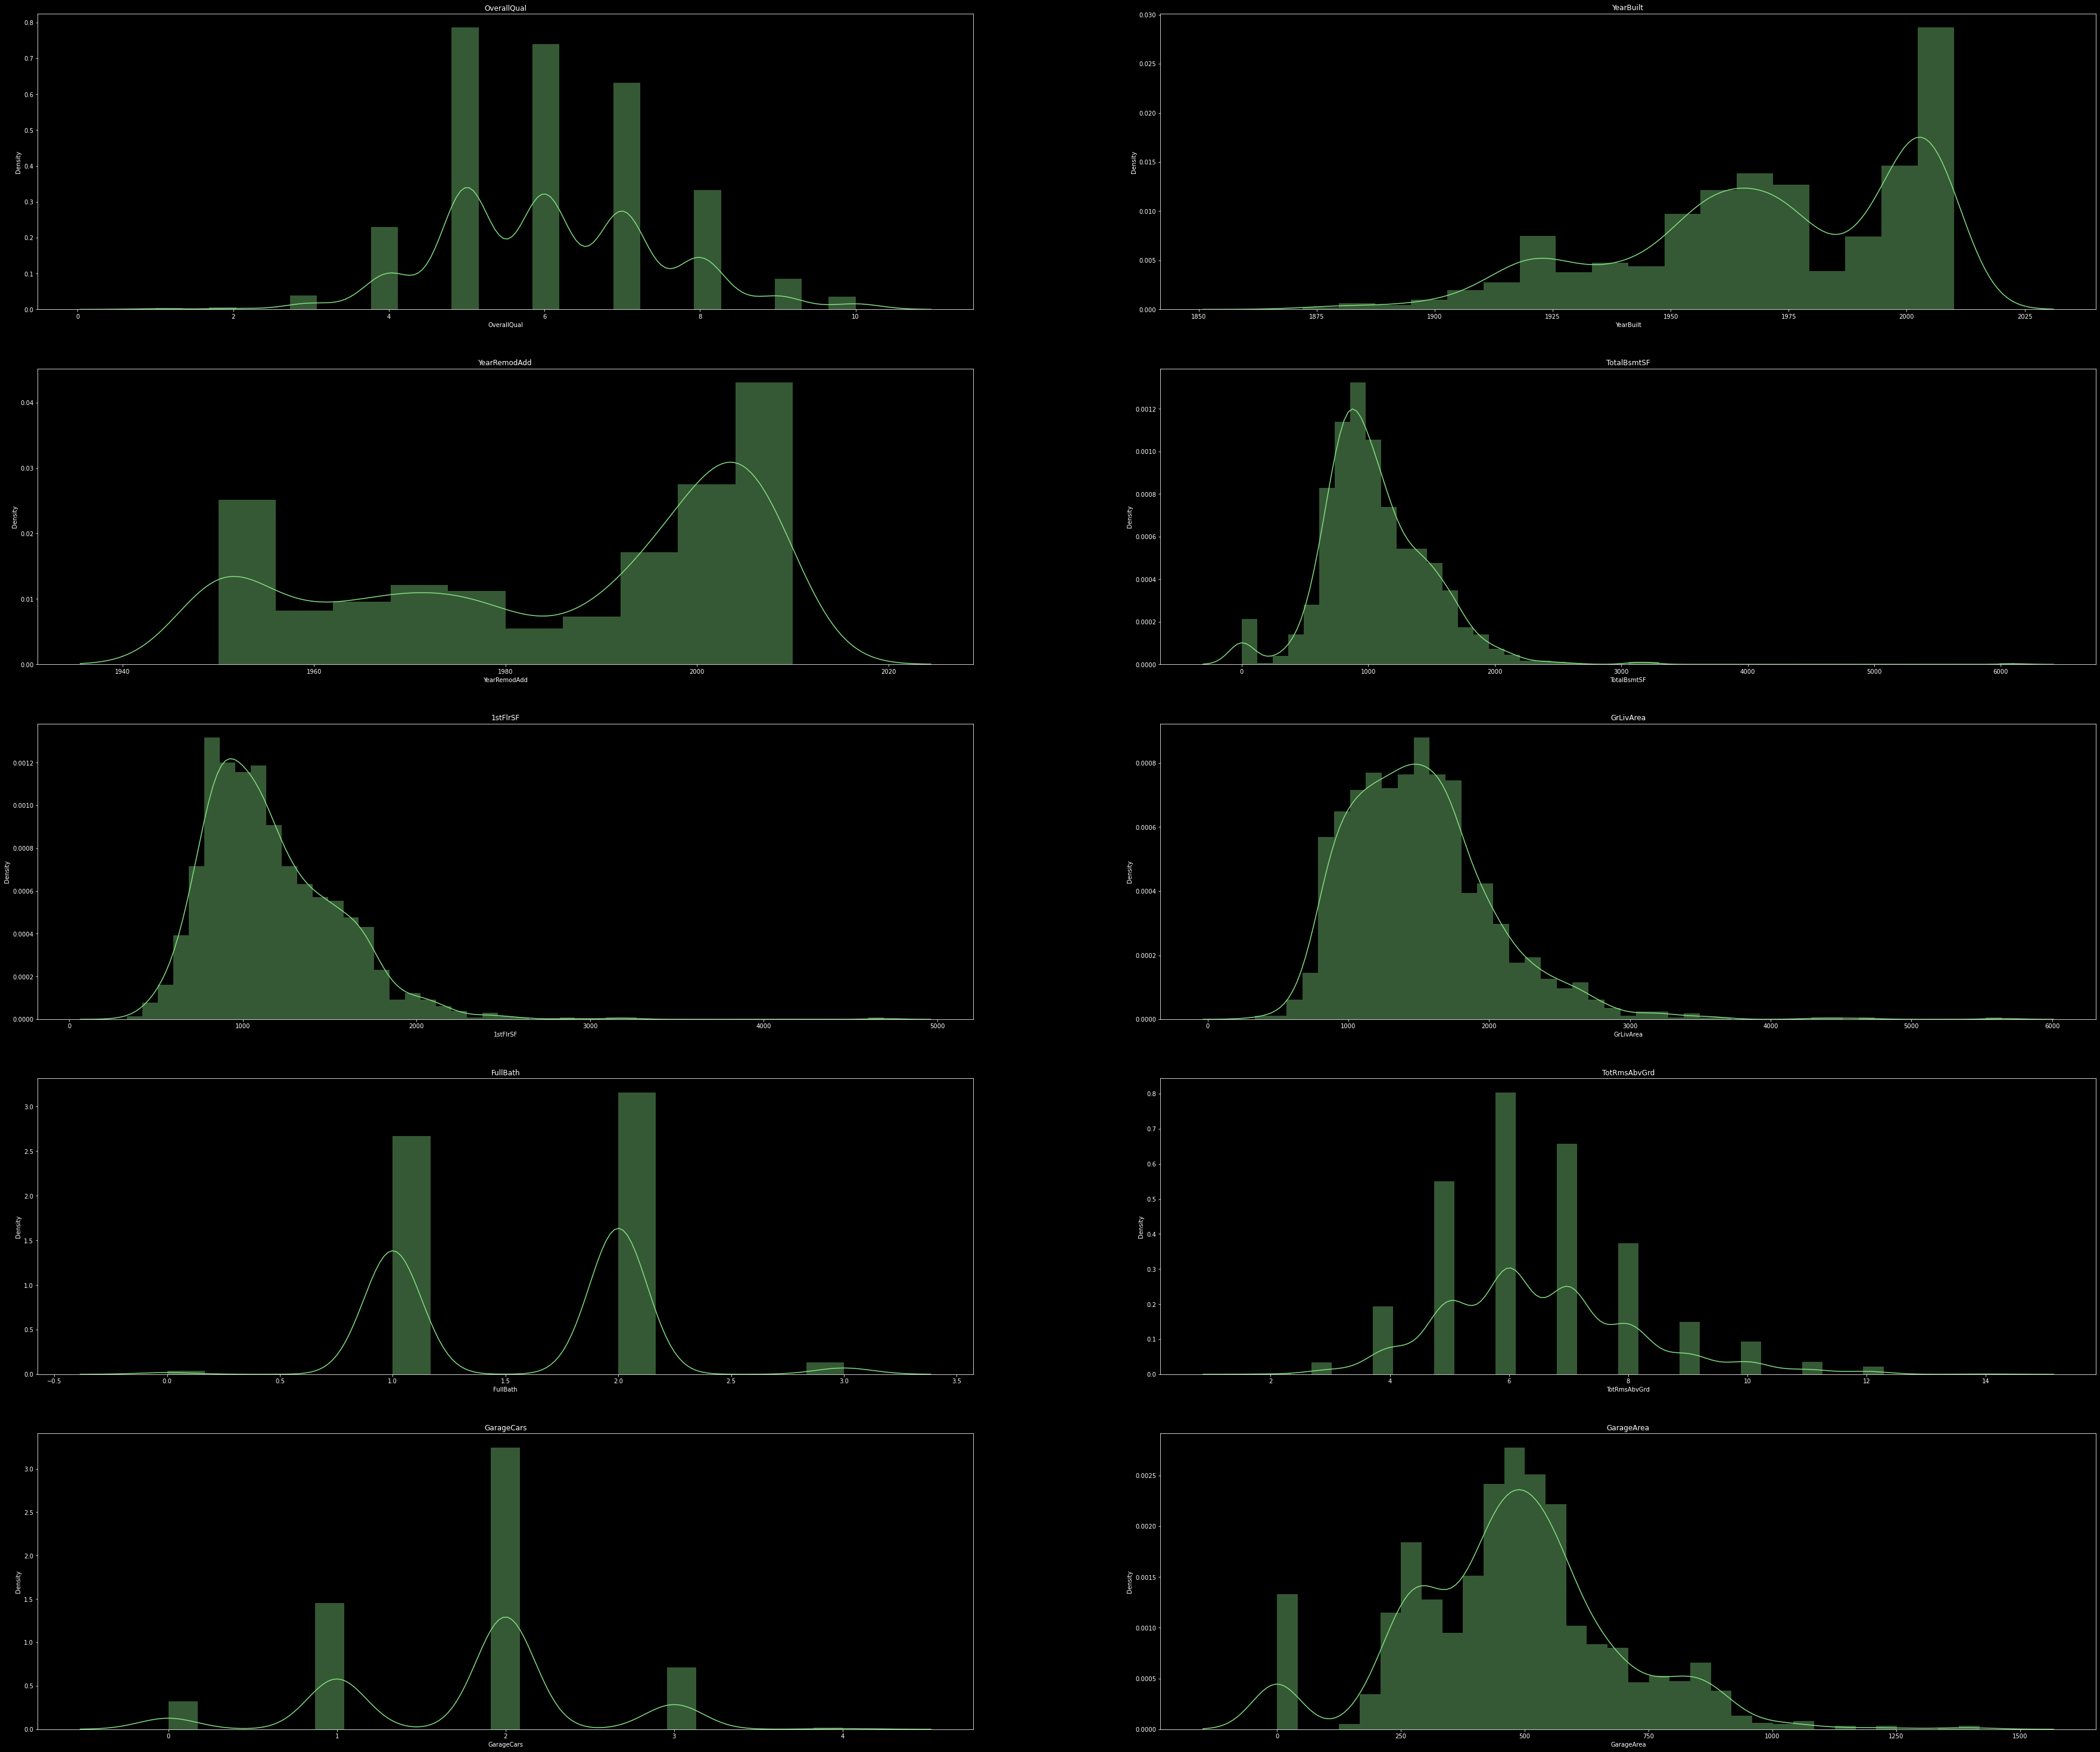

In [22]:
col_n = ['OverallQual',    'YearBuilt', 'YearRemodAdd',  'TotalBsmtSF',
           '1stFlrSF',    'GrLivArea',     'FullBath', 'TotRmsAbvGrd',
         'GarageCars',   'GarageArea']
plt.style.use("dark_background") 
fig, axes = plt.subplots(nrows = 5 , ncols = 2)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(60,50)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.2)
# fig.set_size_inches(35,20)
for ax, col_n in zip(axes, col_n):
    sns.distplot(train[col_n], ax = ax , color = '#85e085')
    ax.set_title(col_n)
#     plt.style.use("dark_background")  

### **Regression plot of each correlated feature with predictor**

In [27]:
px.scatter(train,'OverallQual','SalePrice',trendline='ols',color_discrete_sequence=px.colors.diverging.RdBu).update_layout(template='plotly_dark')

In [28]:
px.scatter(train,train.YearBuilt,'SalePrice',trendline='ols',color_discrete_sequence=px.colors.sequential.Aggrnyl).update_layout(template='plotly_dark')

In [29]:
px.scatter(train,train.YearRemodAdd,'SalePrice',trendline='ols',color_discrete_sequence=px.colors.sequential.Aggrnyl).update_layout(template='plotly_dark')

In [30]:
px.scatter(train,train.TotalBsmtSF,'SalePrice',trendline='ols',color_discrete_sequence=px.colors.sequential.algae).update_layout(template='plotly_dark')

In [31]:
px.scatter(train,train['1stFlrSF'],'SalePrice',trendline='ols',color_discrete_sequence=px.colors.sequential.amp).update_layout(template='plotly_dark')

In [32]:
px.scatter(train,train.GrLivArea,'SalePrice',trendline='ols',color_discrete_sequence=px.colors.sequential.ice_r).update_layout(template='plotly_dark')

In [33]:
px.scatter(train,train.FullBath,'SalePrice',trendline='ols',color_discrete_sequence=px.colors.sequential.Greens).update_layout(template='plotly_dark')

In [34]:
px.scatter(train,train.TotRmsAbvGrd,'SalePrice',trendline='ols',color_discrete_sequence=px.colors.sequential.Darkmint).update_layout(template='plotly_dark')

In [35]:
px.scatter(train,train.GarageCars,'SalePrice',trendline='ols',color_discrete_sequence=px.colors.sequential.Brwnyl).update_layout(template='plotly_dark')

In [36]:
px.scatter(train,train.GarageArea,'SalePrice',trendline='ols',color_discrete_sequence=px.colors.sequential.Mint).update_layout(template='plotly_dark')

# **Encoding**

In [23]:
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)
train_ohe = pd.DataFrame(ohe.fit_transform(train[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition' ]]))
test_ohe = pd.DataFrame(ohe.transform(test[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition' ]]))
train_ohe.index = train.index
test_ohe.index = test.index

In [24]:
train.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
               'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
                   'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual',
                        'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                           'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
                               'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                                       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
                                                                                'SaleCondition' ],axis = 1,inplace = True)

test.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
               'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
                   'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual',
                        'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                           'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
                               'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                                       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
                                                                                'SaleCondition' ],axis = 1,inplace = True)

### **Selecting features based on correlation** 

In [25]:
train = train[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]
test = test[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

In [26]:
train = pd.concat([train,train_ohe],axis = 1)
test = pd.concat([test,test_ohe],axis = 1)
train = train.iloc[:1459]

### **Dropping one encoded to avoid collinearity problem**

In [27]:
train.drop(182,axis = 1,inplace=True)
test.drop(182,axis = 1,inplace = True)

In [28]:
x = train.drop('SalePrice',axis = 1)
y = train.SalePrice

# **Modeling**

In [29]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y,train_size=0.8,random_state=0)

In [30]:
xtrain.shape , xtest.shape , ytrain.shape , ytest.shape

((1167, 200), (292, 200), (1167,), (292,))

In [31]:
def model_acc(estimator,xtrain,ytrain,xtest,ytest):
    estimator = estimator
    estimator.fit(xtrain,ytrain)
    ypred = estimator.predict(xtest)
    print('R-Score: ',np.round(estimator.score(xtest,ytest),5))
    print('R2_Score: ', np.round(r2_score(ytest,ypred),5))        
    print('MEAN ABSOLUTE ERROR: ', np.round(mean_absolute_error(ytest,ypred)))
    print('MEAN SQUARED ERROR: ', np.round(mean_squared_error(ytest,ypred)))
    print('ROOT-MEAN SQUARED ERROR: ', np.round(np.sqrt(mean_squared_error(ytest,ypred))))
    return np.round(r2_score(ytest,ypred),5) , np.round(mean_absolute_error(ytest,ypred)) , np.round(mean_squared_error(ytest,ypred)) , np.round(np.sqrt(mean_squared_error(ytest,ypred)))

In [32]:
models = pd.DataFrame(columns = ['MODEL','R2 Score','MAE','MSE','RMSE'])

In [33]:
fst,scnd,thrd,frth = model_acc(LinearRegression(),xtrain,ytrain,xtest,ytest)

models = models.append({ 'MODEL' : 'Linear' ,
       'R2 Score' : fst ,
       'MAE' : scnd ,
       'MSE' : thrd ,
       'RMSE' : frth 
     },ignore_index=True)

R-Score:  0.87896
R2_Score:  0.87896
MEAN ABSOLUTE ERROR:  19476.0
MEAN SQUARED ERROR:  724510480.0
ROOT-MEAN SQUARED ERROR:  26917.0


In [34]:
fst,scnd,thrd,frth = model_acc(DecisionTreeRegressor(max_depth=8),xtrain,ytrain,xtest,ytest)

models = models.append({ 'MODEL' : 'Decision Tree' ,
       'R2 Score' : fst ,
       'MAE' : scnd ,
       'MSE' : thrd ,
       'RMSE' : frth 
     },ignore_index=True)

R-Score:  0.77129
R2_Score:  0.77129
MEAN ABSOLUTE ERROR:  24984.0
MEAN SQUARED ERROR:  1368995310.0
ROOT-MEAN SQUARED ERROR:  37000.0


In [35]:
fst,scnd,thrd,frth = model_acc(RandomForestRegressor(n_estimators=200),xtrain,ytrain,xtest,ytest)

models = models.append({ 'MODEL' : 'Random Forest' ,
       'R2 Score' : fst ,
       'MAE' : scnd ,
       'MSE' : thrd ,
       'RMSE' : frth 
     },ignore_index=True)

R-Score:  0.89007
R2_Score:  0.89007
MEAN ABSOLUTE ERROR:  16602.0
MEAN SQUARED ERROR:  658035944.0
ROOT-MEAN SQUARED ERROR:  25652.0


In [36]:
fst,scnd,thrd,frth = model_acc(SVR(kernel='linear'),xtrain,ytrain,xtest,ytest)

models = models.append({ 'MODEL' : 'Support Vector Machine' ,
       'R2 Score' : fst ,
       'MAE' : scnd ,
       'MSE' : thrd ,
       'RMSE' : frth 
     },ignore_index=True)

R-Score:  0.80331
R2_Score:  0.80331
MEAN ABSOLUTE ERROR:  22360.0
MEAN SQUARED ERROR:  1177344365.0
ROOT-MEAN SQUARED ERROR:  34312.0


In [37]:
models.sort_values(by ='RMSE')

,MODEL,R2 Score,MAE,MSE,RMSE
2,Random Forest,0.89007,16602.0,6.580359e+08,25652.0
0,Linear,0.87896,19476.0,7.245105e+08,26917.0
3,Support Vector Machine,0.80331,22360.0,1.177344e+09,34312.0
1,Decision Tree,0.77129,24984.0,1.368995e+09,37000.0


# **Submission**

In [47]:
rfr = DecisionTreeRegressor(max_depth=8)
rfr.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=8)

In [48]:
ypred = rfr.predict(test)
ypred = pd.Series(ypred,name='SalePrice')

In [49]:
ypred

0       141917.924528
1       146305.952381
2       203688.888889
3       171746.650794
4       236062.000000
            ...      
1454     86866.666667
1455    107686.986301
1456    146305.952381
1457     86866.666667
1458    218054.838710
Name: SalePrice, Length: 1459, dtype: float64

In [50]:
ID

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [51]:
ID.shape , ypred.shape

((1459,), (1459,))

In [52]:
submission = pd.concat([ID,ypred],axis = 1)

In [53]:
submission

,Id,SalePrice
0,1461,141917.924528
1,1462,146305.952381
2,1463,203688.888889
3,1464,171746.650794
4,1465,236062.000000
...,...,...
1454,2915,86866.666667
1455,2916,107686.986301
1456,2917,146305.952381
1457,2918,86866.666667


In [54]:
submission.to_csv('submission.csv', index = False)